In [1]:
import $file.scripts.importer

importer.loadProjectDependencies

import $file.$               



In [2]:
import scala.collection.JavaConverters._
import scala.collection.JavaConversions._
import edu.stanford.math.plex4._
import edu.stanford.math.plex4.api._
import edu.stanford.math.plex4.visualization._
import edu.stanford.math.plex4.homology.barcodes._

import breeze.numerics._
import breeze.linalg._
import breeze.math._
import breeze.stats.{mean, stddev}
import breeze.util.JavaArrayOps

import tda.persistence.Analysis._
import tda.persistence.Math._

def drawBarcodes(images: Seq[java.awt.image.BufferedImage]) = {
  images foreach publish.png 
}


import scala.collection.JavaConverters._

import scala.collection.JavaConversions._

import edu.stanford.math.plex4._

import edu.stanford.math.plex4.api._

import edu.stanford.math.plex4.visualization._

import edu.stanford.math.plex4.homology.barcodes._


import breeze.numerics._

import breeze.linalg._

import breeze.math._

import breeze.stats.{mean, stddev}

import breeze.util.JavaArrayOps


import tda.persistence.Analysis._

import tda.persistence.Math._


defined function drawBarcodes

In [3]:
lazy val stream = Plex4.createExplicitSimplexStream()

stream.addVertex(0)
stream.addVertex(1)
stream.addVertex(2)
stream.addElement(Array(0, 1))
stream.addElement(Array(0, 2))
stream.addElement(Array(1,2))
stream.finalizeStream()

stream.getSize

stream: streams.impl.ExplicitSimplexStream = <lazy>
res2_8: Int = 6

In [4]:
lazy val persistence = Plex4.getModularSimplicialAlgorithm(3, 2)
lazy val circleIntervals = persistence.computeIndexIntervals(stream)

persistence: homology.interfaces.AbstractPersistenceAlgorithm[homology.chain_basis.Simplex] = <lazy>
circleIntervals: BarcodeCollection[Integer] = <lazy>

## 9 - sphere 

In [5]:
lazy val dimension = 9
lazy val stream = Plex4.createExplicitSimplexStream()
stream.addElement(0 to (dimension + 1) toArray)
stream.ensureAllFaces()
stream.removeElementIfPresent(0 to (dimension + 1) toArray)
stream.finalizeStream()

lazy val persistence9 = Plex4.getModularSimplicialAlgorithm(dimension + 1, 2)

dimension: Int = <lazy>
stream: streams.impl.ExplicitSimplexStream = <lazy>
res4_4: Boolean = true
persistence9: homology.interfaces.AbstractPersistenceAlgorithm[homology.chain_basis.Simplex] = <lazy>

In [6]:
lazy val intervals9 = persistence.computeIntervals(stream)

intervals9: BarcodeCollection[java.lang.Double] = <lazy>

# House

![](https://github.com/appliedtopology/javaplex/raw/master/reports/javaplex_tutorial/houseFig.png)

### Explicit stream

In [7]:
lazy val houseStream = Plex4.createExplicitSimplexStream();
houseStream.addVertex(1, 0);
houseStream.addVertex(2, 0);
houseStream.addVertex(3, 0);
houseStream.addVertex(4, 0);
houseStream.addVertex(5, 1);
houseStream.addElement(Array(1, 2), 0);
houseStream.addElement(Array(2,3), 0);
houseStream.addElement(Array(3, 4), 0);
houseStream.addElement(Array(4, 1), 0);
houseStream.addElement(Array(3, 5), 2);
houseStream.addElement(Array(4, 5), 3);
houseStream.addElement(Array(3, 4, 5), 7);
houseStream.finalizeStream()

houseStream: streams.impl.ExplicitSimplexStream = <lazy>

### Vietoris-Rips from point cloud

In [8]:
lazy val pointCloud = examples.PointCloudExamples.getHouseExample()
lazy val houseMetricSpace= new metric.impl.EuclideanMetricSpace(pointCloud)

lazy val (maxDimension, maxFiltrationValue, numDivisions)= (3, 4.0, 100)

lazy val vietorisRipsStream = api.Plex4.createVietorisRipsStream(
  houseMetricSpace,
  maxDimension,
  maxFiltrationValue,
  numDivisions)


lazy val (_, houseImgs) = intervalsWithImages(vietorisRipsStream, maxDimension, maxFiltrationValue, persistence)

pointCloud: Array[Array[Double]] = <lazy>
houseMetricSpace: metric.impl.EuclideanMetricSpace = <lazy>
maxDimension: Int = <lazy>
maxFiltrationValue: Double = <lazy>
numDivisions: Int = <lazy>
vietorisRipsStream: streams.impl.VietorisRipsStream[Array[Double]] = <lazy>
houseImgs: List[java.awt.image.BufferedImage] = <lazy>

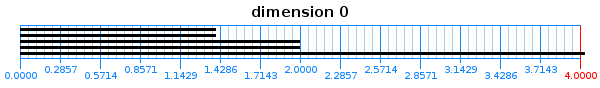

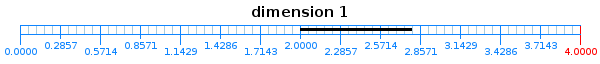

In [9]:
drawBarcodes(houseImgs)

## Torus homology 

Next dataset consists of 400 points sampled from torus, represented as

$S^1 \times S^1 \subset \mathbb{R}^4$

It is a basic fact of algebraic topology, that torus homology groups(over $\mathbb{Z}_2$) are

$H_0 = \mathbb{Z}_2$

$H_1 = \mathbb{Z}_2 \times \mathbb{Z}_2$

$H_2 = \mathbb{Z}_2$

In [10]:
lazy val torusData = csvread(importer.loadData("pointsTorusGrid.csv"))

lazy val torusDataArray = JavaArrayOps.dmDToArray2(torusData)

lazy val (maxDimension, maxFiltrationValue, numDivisions) = (3, 0.9, 100)

lazy val torusStream = Plex4.createVietorisRipsStream(torusDataArray, maxDimension, maxFiltrationValue, numDivisions)

lazy val (_, torusImages) = intervalsWithImages(torusStream, maxDimension, maxFiltrationValue, persistence)

torusData: DenseMatrix[Double] = <lazy>
torusDataArray: Array[Array[Double]] = <lazy>
maxDimension: Int = <lazy>
maxFiltrationValue: Double = <lazy>
numDivisions: Int = <lazy>
torusStream: streams.impl.VietorisRipsStream[Array[Double]] = <lazy>
torusImages: List[java.awt.image.BufferedImage] = <lazy>

In [11]:
println(Seq(
  "TorusStream for",
  s"maxFiltrationValue = ${maxFiltrationValue}",
  s"has ${torusStream.getSize()} simplices").mkString("\n"))

TorusStream for
maxFiltrationValue = 0.9
has 82479 simplices


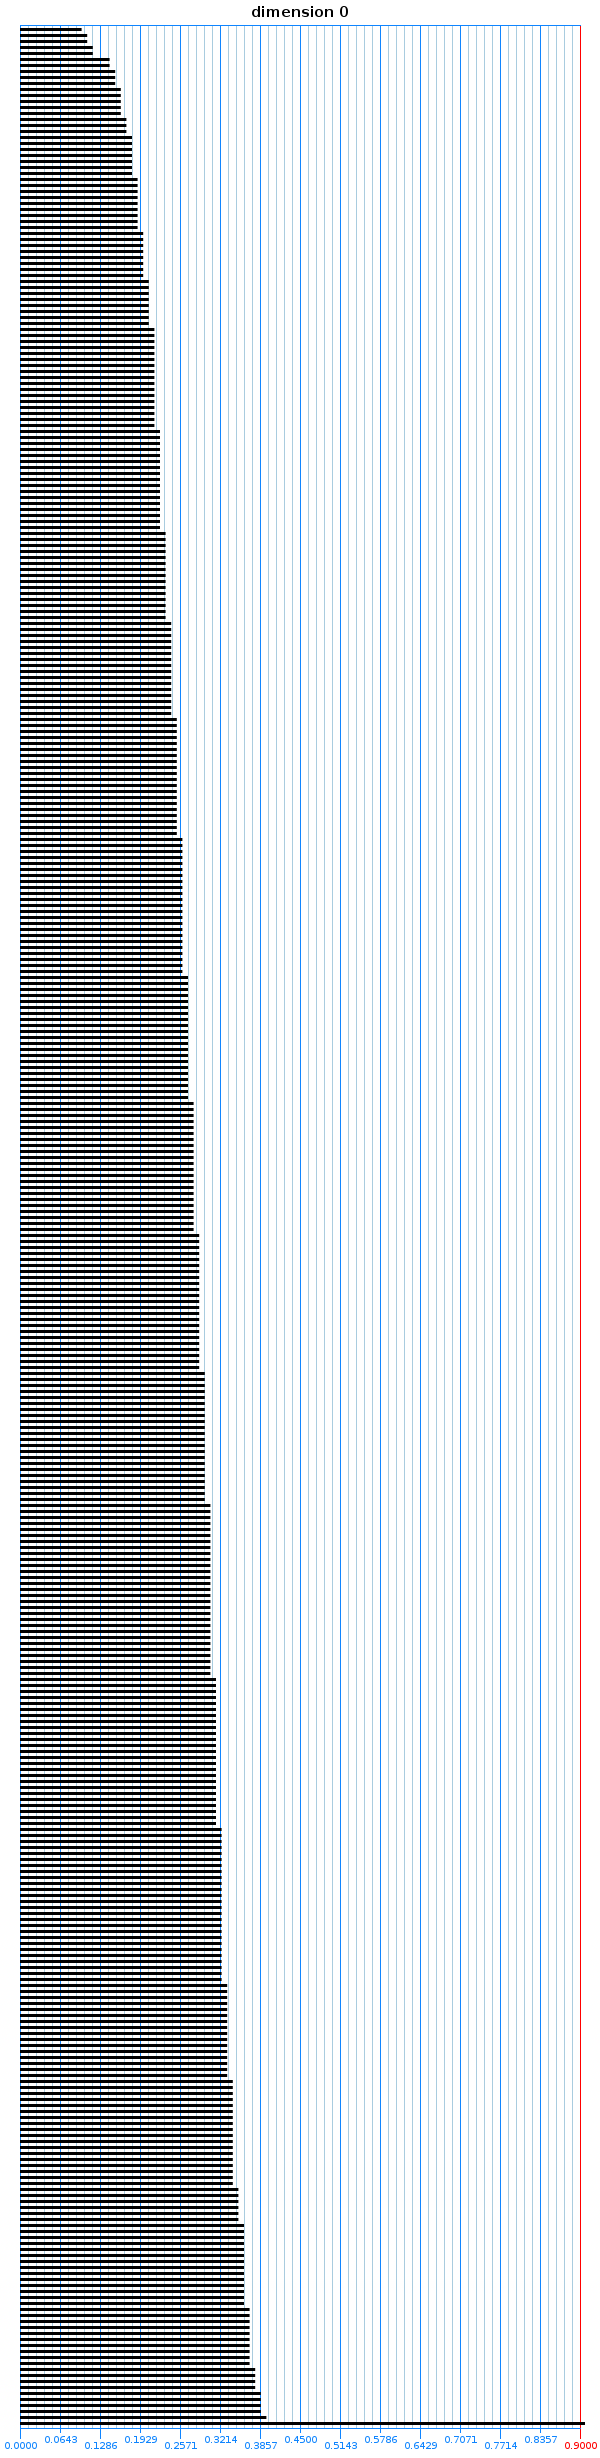

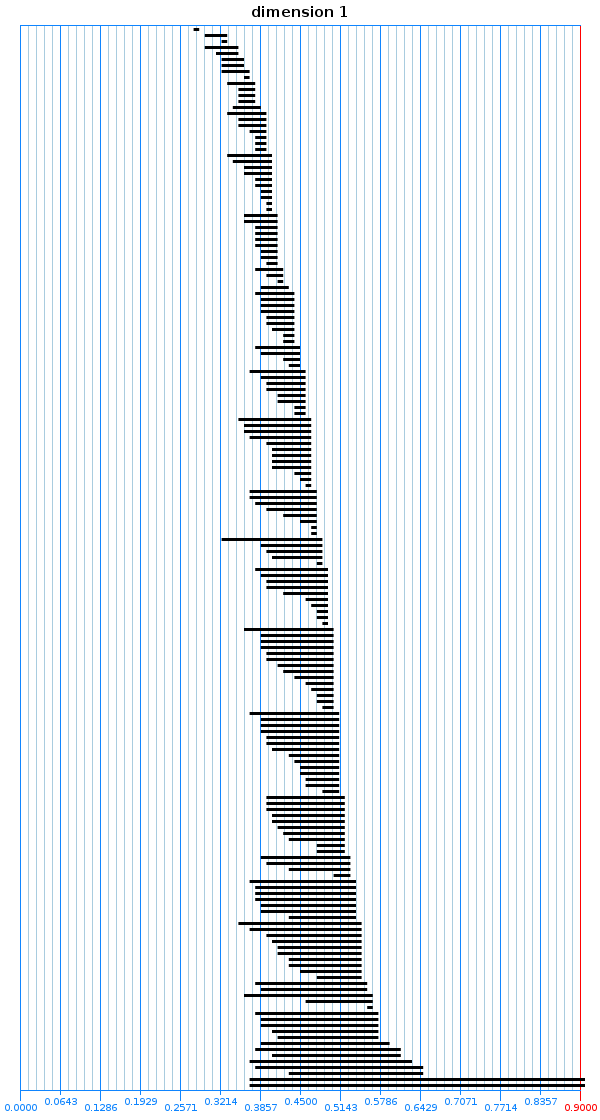

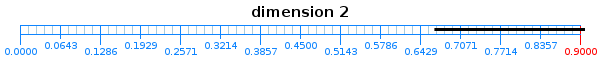

In [12]:
drawBarcodes(torusImages)

Barcodes longest intervals coincide with aforementioned fact

## Torus homology with landmarks 

We select 50 samples using sequential maxmin.

```
sequentialMaxMin(X, N)
    L = {}
    pick random l0 from X
    L = {l0}
    while L's size < N
        l = argmax d(x, L)
        add l to L
    return L
```

In [13]:
val noLandmarkPoints = 50 
val landmarksMaxFiltrationValue = 2 * maxFiltrationValue 


noLandmarkPoints: Int = 50
landmarksMaxFiltrationValue: Double = 1.8

In [14]:
lazy val landmarkIndices = Plex4
  .createMaxMinSelector(torusDataArray, noLandmarkPoints)
  .getLandmarkPoints()

lazy val torusLandmarks = landmarkIndices.map(torusDataArray(_))

lazy val torusLandmarksStream = Plex4.createVietorisRipsStream(torusLandmarks, maxDimension, landmarksMaxFiltrationValue, numDivisions)

lazy val (_, toruslandmarkImages) = intervalsWithImages(torusLandmarksStream, maxDimension, landmarksMaxFiltrationValue, persistence)

landmarkIndices: Array[Int] = <lazy>
torusLandmarks: Array[Array[Double]] = <lazy>
torusLandmarksStream: streams.impl.VietorisRipsStream[Array[Double]] = <lazy>
toruslandmarkImages: List[java.awt.image.BufferedImage] = <lazy>

In [15]:
println(Seq(
  s"LandmarksTorusStream for ${torusLandmarks.size} landmarks",
  s"landmarksMaxFiltrationValue = ${landmarksMaxFiltrationValue} = ${landmarksMaxFiltrationValue / maxFiltrationValue} * maxFiltrationValue",
  s"has ${torusLandmarksStream.getSize()} simplices",
  s"(${torusStream.getSize() / torusLandmarksStream.getSize()}x less than original stream)").mkString("\n"))

LandmarksTorusStream for 50 landmarks
landmarksMaxFiltrationValue = 1.8 = 2.0 * maxFiltrationValue
has 2662 simplices
(30x less than original stream)


As we can see, landmark complex has order of magnitude less simplices.

Comparing barcodes of original and reduced complex we see that landmark complex has less small intervals, but true torus intervals are present - sampling by maxmin can be thought as a denoising procedure.

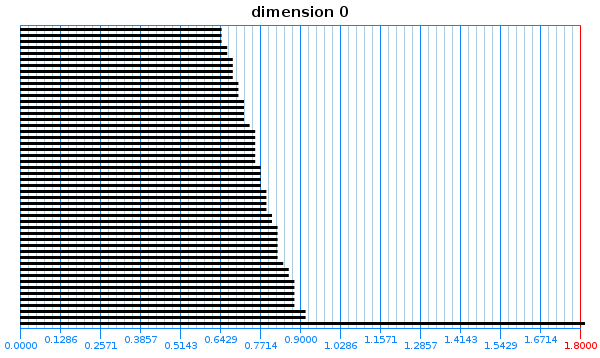

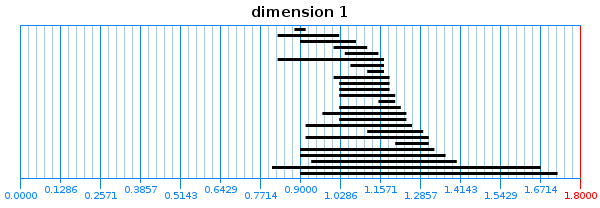

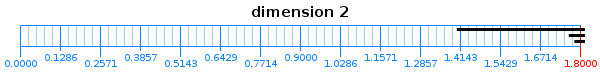

In [16]:
drawBarcodes(toruslandmarkImages)

# Torus embedded in $\mathbb{R}^{10}$

We embed torus in $\mathbb{R}^{10} = \mathbb{R}^5 \times \mathbb{R}^5$

By $f \times f$ where $f: \mathbb{R}^2 \to \mathbb{R}^5$

$f(x,y) = (x^2, y^2, \sqrt{2}xy, \sqrt{2}x, \sqrt{2}y, 1)$

It is easily seen that $f$ is a continuous bijection. Inverse function is also continuous.

In [ ]:
lazy val embeddedTorusDataArray = torusDataArray.map { v =>
  val Array(x1, y1, x2, y2) = v
  embedding(x1, y1) ++ embedding(x2, y2)
}

In [ ]:
lazy val embeddedTorusLandmarkIndices = Plex4
  .createMaxMinSelector(embeddedTorusDataArray, 85)
  .getLandmarkPoints()

lazy val embeddedTorusLandmarks = embeddedTorusLandmarkIndices.map(embeddedTorusDataArray(_))

val embeddingFiltrationValue = 3 * maxFiltrationValue 

lazy val embeddedTorusLandmarksStream = Plex4.createVietorisRipsStream(embeddedTorusLandmarks, maxDimension, embeddingFiltrationValue, numDivisions)

lazy val (_, embeddedTorusLandmarkImages) = intervalsWithImages(embeddedTorusLandmarksStream, maxDimension, embeddingFiltrationValue, persistence)

In [ ]:
println(Seq(
  "Embedded Torus Stream for",
  s"maxFiltrationValue = ${embeddingFiltrationValue}",
  s"has ${embeddedTorusLandmarksStream.getSize()} simplices").mkString("\n"))

As we can see, we can retrieve the same homologies, but we need to tweak parameters due to embedding's nonlinear character.

In [ ]:
drawBarcodes(embeddedTorusLandmarkImages)